# Step 1: DATA COLLECTING

In [1]:
import pandas as pd

wel_fake = pd.read_csv('https://media.githubusercontent.com/media/Gyaanendra/SML-Project-cset211/refs/heads/main/raw_data/WELFake_Dataset.csv')

In [2]:
wel_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [3]:
wel_fake.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


## **selecting only relevant columns**

In [4]:
wel_fake = wel_fake[['title', 'text', 'label']]
wel_fake['label'] = wel_fake['label'].map({0: 0, 1: 1}) 
wel_fake.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [5]:
# Load ISOT Fake and True Datasets
print("Loading ISOT Datasets...")
isot_fake = pd.read_csv('https://media.githubusercontent.com/media/Gyaanendra/SML-Project-cset211/refs/heads/main/raw_data/Fake.csv')
isot_fake['label'] = 0  # Fake
isot_true = pd.read_csv('https://media.githubusercontent.com/media/Gyaanendra/SML-Project-cset211/refs/heads/main/raw_data/True.csv')
isot_true['label'] = 1  # Real
# Select relevant columns
isot_fake = isot_fake[['title', 'text', 'label']]
isot_true = isot_true[['title', 'text', 'label']]
# Combine ISOT Fake and True
isot = pd.concat([isot_fake, isot_true], ignore_index=True)
isot.head(10)

Loading ISOT Datasets...


,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,0


## Merging two data sets

In [6]:
wel_fake.shape

(72134, 3)

In [7]:
wel_fake.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [8]:
isot.shape

(44898, 3)

In [9]:
isot.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
# Merge all datasets
print("Merging datasets...")
full_df = pd.concat([wel_fake, isot], ignore_index=True)
full_df.head(12)

Merging datasets...


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [11]:
full_df.shape

(117032, 3)

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117032 entries, 0 to 117031
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   116474 non-null  object
 1   text    116993 non-null  object
 2   label   117032 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [13]:
full_df.isnull().sum()

title    558
text      39
label      0
dtype: int64

## Basic Cleaning

In [14]:
# Basic cleaning
print("Cleaning data...")
# Drop rows with missing text or label
full_df_new = full_df.dropna(subset=['text', 'title'])
# Remove duplicates based on text
full_df_new = full_df_new.drop_duplicates(subset=['text'])
# Ensure label is integer
full_df_new['label'] = full_df_new['label'].astype(int)

Cleaning data...


In [15]:
full_df_new.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
full_df_new.shape

(62200, 3)

In [17]:
full_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62200 entries, 0 to 72132
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62200 non-null  object
 1   text    62200 non-null  object
 2   label   62200 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [18]:
# Verify balance
print("Label distribution:")
print(full_df_new['label'].value_counts())

Label distribution:
label
0    34620
1    27580
Name: count, dtype: int64


In [19]:
# full_df_new.to_csv("data.csv", index=False)

# Step 2: Preprocessing and Feature Engineering

In [20]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Remove URLs, punctuation, numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # URLs
    text = re.sub(r'[^\w\s]', '', text)  # Punctuation
    text = re.sub(r'\d+', '', text)  # Numbers
    # Remove stopwords and lemmatize
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text.strip()

In [22]:
#loading merged_dataset  
df = pd.read_csv('https://media.githubusercontent.com/media/Gyaanendra/SML-Project-cset211/refs/heads/main/merged_data/data.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62200 entries, 0 to 62199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62200 non-null  object
 1   text    62200 non-null  object
 2   label   62200 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [24]:
df['processed_title'] = df['title'].apply(preprocess_text)
df['processed_text'] = df['text'].apply(preprocess_text)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62200 entries, 0 to 62199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            62200 non-null  object
 1   text             62200 non-null  object
 2   label            62200 non-null  int64 
 3   processed_title  62200 non-null  object
 4   processed_text   62200 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


In [26]:
df.head(10)

,title,text,label,processed_title,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert following threat co...,comment expected barack obama member fyf fukyo...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obamas attorney general say charl...,demonstrator gathered last night exercising co...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu us story christian c...,dozen politically active pastor came private d...
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan russia unvelis image terrifying new supe...,r sarmat missile dubbed satan replace s fly mi...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,say one time someone sued southern poverty law...
5,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,dr ben carson targeted irs never audit spoke n...,dr ben carson tell story happened spoke obama
6,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,house intel chair trumprussia fake story evide...,
7,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,sport bar owner ban nfl gameswill show true am...,owner ringling bar located south white sulphur...
8,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,latest pipeline leak underscore danger dakota ...,file sept file photo marker welcome commuter c...
9,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,gop senator smacked punchable altright nazi in...,punchable altright nazi internet got thorough ...


In [27]:
df['title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [28]:
df['processed_title'][0]

'law enforcement high alert following threat cop white blacklivesmatter fyf terrorist video'

In [29]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [30]:
df['processed_text'][0]

'comment expected barack obama member fyf fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf lolatwhitefear twitter page pm show urging supporter call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyfthe radio show aired pm eastern standard timeduring show caller clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf conference callsan unidentified black man said mother fkers start fing like u bunch niers takin one u roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspired cop started losing people 

In [31]:
# df.to_csv('data_textCleanedProcessed.csv', index=False)

# Step 3: Model implementation 

## traditional Method

In [32]:
df = pd.read_csv('https://media.githubusercontent.com/media/Gyaanendra/SML-Project-cset211/refs/heads/main/cleaned_preprocessed%20_data/data_textCleanedProcessed.csv')
df.head()

,title,text,label,processed_title,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert following threat co...,comment expected barack obama member fyf fukyo...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obamas attorney general say charl...,demonstrator gathered last night exercising co...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu us story christian c...,dozen politically active pastor came private d...
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan russia unvelis image terrifying new supe...,r sarmat missile dubbed satan replace s fly mi...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,say one time someone sued southern poverty law...


## Step 1: Combine Title and Text

In [33]:
# Combine processed_title and processed_text
df['combined_text'] = df['processed_title'].fillna('') + ' ' + df['processed_text'].fillna('')
df.head()

,title,text,label,processed_title,processed_text,combined_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert following threat co...,comment expected barack obama member fyf fukyo...,law enforcement high alert following threat co...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obamas attorney general say charl...,demonstrator gathered last night exercising co...,unbelievable obamas attorney general say charl...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu us story christian c...,dozen politically active pastor came private d...,bobby jindal raised hindu us story christian c...
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan russia unvelis image terrifying new supe...,r sarmat missile dubbed satan replace s fly mi...,satan russia unvelis image terrifying new supe...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,say one time someone sued southern poverty law...,time christian group sue amazon splc designati...


## Step 2: Vectorize Text

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  
X = vectorizer.fit_transform(df['combined_text'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Train and Evaluate Models

##  1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.9446


## 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
accuracy_rf = model_rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9382


## 3. XGBoost

In [37]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
accuracy_xgb = model_xgb.score(X_test, y_test)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.9605


## 4. Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
accuracy_nb = model_nb.score(X_test, y_test)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

Naive Bayes Accuracy: 0.8410


# LSTM and bert

In [52]:
# --------------------------------------------------------------
# 1. CLEAN INSTALL – run this **once** at the top of the notebook
# --------------------------------------------------------------
!pip install -q --upgrade "pip>=24.0"
!pip install -q \
    "tensorflow==2.16.1" \
    "transformers==4.44.2" \
    "tf-keras==2.16.0" \
    "tokenizers==0.19.1" \
    "sentencepiece==0.2.0" \
    --no-deps

# Optional: install a minimal set of extras that don’t pull in newer TF
!pip install -q scikit-learn matplotlib pandas numpy

In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, TFAutoModel, logging as hf_logging

hf_logging.set_verbosity_error()          # silence HF warnings
tf.keras.utils.set_random_seed(42)

In [54]:
train_texts, val_texts, y_train, y_val = train_test_split(
    df['combined_text'], df['label'],
    test_size=0.20, random_state=42, stratify=df['label']
)

print(f"Train size: {len(train_texts)}, Validation size: {len(val_texts)}")

Train size: 49760, Validation size: 12440


In [55]:
MAX_LEN    = 128
BATCH_SIZE = 32

def build_dataset(texts, labels, tokenizer, shuffle=False):
    enc = tokenizer(
        list(texts),
        truncation=True,
        padding='max_length',
        max_length=MAX_LEN,
        return_tensors='tf'
    )
    ds = tf.data.Dataset.from_tensor_slices(
        ({
            'input_ids': enc['input_ids'],
            'attention_mask': enc['attention_mask']
         }, labels)
    )
    if shuffle:
        ds = ds.shuffle(1000, reshuffle_each_iteration=True)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [56]:
class HFEncoderLayer(tf.keras.layers.Layer):
    """
    Wraps a HuggingFace TFAutoModel so it can be used inside a Keras functional model.
    """
    def __init__(self, model_name: str, **kwargs):
        super().__init__(**kwargs)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.encoder   = TFAutoModel.from_pretrained(model_name)
        self.encoder.trainable = False      # freeze (set True later if you want fine‑tuning)

    def call(self, inputs):
        # inputs is a dict: {'input_ids': ..., 'attention_mask': ...}
        output = self.encoder(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            training=False
        )
        return output.last_hidden_state      # (batch, seq_len, hidden)

In [57]:
def create_model(base_name: str, bidirectional: bool = False):
    # ---- 1. Inputs -------------------------------------------------
    inputs = {
        'input_ids':      layers.Input(shape=(MAX_LEN,), dtype=tf.int32,  name='input_ids'),
        'attention_mask': layers.Input(shape=(MAX_LEN,), dtype=tf.int32,  name='attention_mask')
    }

    # ---- 2. HF encoder layer ---------------------------------------
    encoder_layer = HFEncoderLayer(base_name)
    sequence_output = encoder_layer(inputs)          # (batch, seq, hidden)

    # ---- 3. RNN head ------------------------------------------------
    if bidirectional:
        rnn = layers.Bidirectional(layers.LSTM(128, return_sequences=False))(sequence_output)
    else:
        rnn = layers.LSTM(128, return_sequences=False)(sequence_output)

    # ---- 4. Classification head ------------------------------------
    x = layers.Dropout(0.3)(rnn)
    x = layers.Dense(64, activation='relu')(x)
    logits = layers.Dense(1, activation='sigmoid')(x)

    # ---- 5. Final model ---------------------------------------------
    model = tf.keras.Model(inputs=inputs, outputs=logits)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=2e-5),
        loss=losses.BinaryCrossentropy(),
        metrics=[metrics.AUC(name='auc'), metrics.BinaryAccuracy(name='accuracy')]
    )
    return model, encoder_layer.tokenizer

In [58]:
def train_and_evaluate(name, base_name, bidirectional=False):
    print(f"\n=== Training {name} ===")
    model, tokenizer = create_model(base_name, bidirectional=bidirectional)

    train_ds = build_dataset(train_texts, y_train.values, tokenizer, shuffle=True)
    val_ds   = build_dataset(val_texts,   y_val.values,   tokenizer, shuffle=False)

    es = callbacks.EarlyStopping(monitor='val_auc', patience=2,
                                 restore_best_weights=True, mode='max')

    history = model.fit(train_ds, validation_data=val_ds,
                        epochs=10, callbacks=[es], verbose=1)

    # ---- Predict ----------------------------------------------------
    val_pred_prob = model.predict(val_ds, verbose=0).ravel()
    val_pred_lbl  = (val_pred_prob >= 0.5).astype(int)

    acc  = accuracy_score(y_val, val_pred_lbl)
    auc  = roc_auc_score(y_val, val_pred_prob)
    report = classification_report(y_val, val_pred_lbl, output_dict=True)

    print(f"{name} → Acc: {acc:.4f} | ROC‑AUC: {auc:.4f}")

    path = f"{name.replace(' ', '_')}.h5"
    model.save(path)

    return {
        'name': name, 'model_path': path,
        'accuracy': acc, 'roc_auc': auc,
        'history': history,
        'y_true': y_val.values,
        'y_pred_prob': val_pred_prob,
        'y_pred_lbl': val_pred_lbl,
        'report': report
    }

In [59]:
results = []

results.append(train_and_evaluate('RoBERTa + LSTM',       'roberta-base',            bidirectional=False))
results.append(train_and_evaluate('RoBERTa + Bi‑LSTM',   'roberta-base',            bidirectional=True))
results.append(train_and_evaluate('DistilBERT + LSTM',   'distilbert-base-uncased', bidirectional=False))
results.append(train_and_evaluate('DistilBERT + Bi‑LSTM','distilbert-base-uncased', bidirectional=True))


=== Training RoBERTa + LSTM ===
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: name 'List' is not defined
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/10


I0000 00:00:1763063892.168314     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


1555/1555 ━━━━━━━━━━━━━━━━━━━━ 595s 370ms/step - accuracy: 0.6798 - auc: 0.7430 - loss: 0.5778 - val_accuracy: 0.8604 - val_auc: 0.9315 - val_loss: 0.3361
Epoch 2/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 569s 366ms/step - accuracy: 0.8660 - auc: 0.9303 - loss: 0.3313 - val_accuracy: 0.8809 - val_auc: 0.9486 - val_loss: 0.2953
Epoch 3/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 571s 368ms/step - accuracy: 0.8884 - auc: 0.9481 - loss: 0.2841 - val_accuracy: 0.8934 - val_auc: 0.9589 - val_loss: 0.2647
Epoch 4/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 571s 367ms/step - accuracy: 0.8971 - auc: 0.9563 - loss: 0.2604 - val_accuracy: 0.9072 - val_auc: 0.9649 - val_loss: 0.2368
Epoch 5/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 572s 368ms/step - accuracy: 0.9080 - auc: 0.9632 - loss: 0.2379 - val_accuracy: 0.9141 - val_auc: 0.9688 - val_loss: 0.2257
Epoch 6/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 572s 368ms/step - accuracy: 0.9160 - auc: 0.9684 - loss: 0.2196 - val_accuracy: 0.9095 - val_auc: 0.9716 - val_loss: 0.2354
Epoch 7/10
1555

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch 1/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 318s 197ms/step - accuracy: 0.6973 - auc: 0.7627 - loss: 0.5619 - val_accuracy: 0.8565 - val_auc: 0.9159 - val_loss: 0.3675
Epoch 2/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 302s 194ms/step - accuracy: 0.8593 - auc: 0.9162 - loss: 0.3583 - val_accuracy: 0.8703 - val_auc: 0.9415 - val_loss: 0.3295
Epoch 3/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 303s 195ms/step - accuracy: 0.8824 - auc: 0.9398 - loss: 0.3041 - val_accuracy: 0.8999 - val_auc: 0.9541 - val_loss: 0.2714
Epoch 4/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 302s 194ms/step - accuracy: 0.8964 - auc: 0.9528 - loss: 0.2690 - val_accuracy: 0.8895 - val_auc: 0.9607 - val_loss: 0.2739
Epoch 5/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 302s 194ms/step - accuracy: 0.9089 - auc: 0.9622 - loss: 0.2400 - val_accuracy: 0.9150 - val_auc: 0.9688 - val_loss: 0.2215
Epoch 6/10
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 304s 196ms/step - accuracy: 0.9177 - auc: 0.9692 - loss: 0.2162 - val_accuracy: 0.9226 - val_auc: 0.9722 - val_loss: 0.2097
Epoc

In [66]:
summary = pd.DataFrame([{
    'Model': r['name'],
    'Accuracy': f"{r['accuracy']:.4f}",
    'ROC‑AUC' : f"{r['roc_auc']:.4f}"
} for r in results])
display(summary)

,Model,Accuracy,ROC‑AUC
0,RoBERTa + LSTM,0.9359,0.9815
1,RoBERTa + Bi‑LSTM,0.9549,0.9914
2,DistilBERT + LSTM,0.9401,0.9825
3,DistilBERT + Bi‑LSTM,0.9545,0.9908



=== RoBERTa + LSTM ===
              precision    recall  f1-score   support

           0     0.9373    0.9483    0.9428      6924
           1     0.9341    0.9204    0.9272      5516

    accuracy                         0.9359     12440
   macro avg     0.9357    0.9344    0.9350     12440
weighted avg     0.9359    0.9359    0.9359     12440



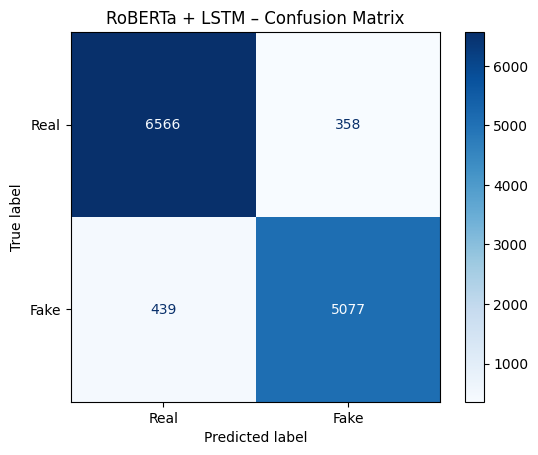


=== RoBERTa + Bi‑LSTM ===
              precision    recall  f1-score   support

           0     0.9807    0.9375    0.9586      6924
           1     0.9256    0.9768    0.9505      5516

    accuracy                         0.9549     12440
   macro avg     0.9531    0.9571    0.9545     12440
weighted avg     0.9563    0.9549    0.9550     12440



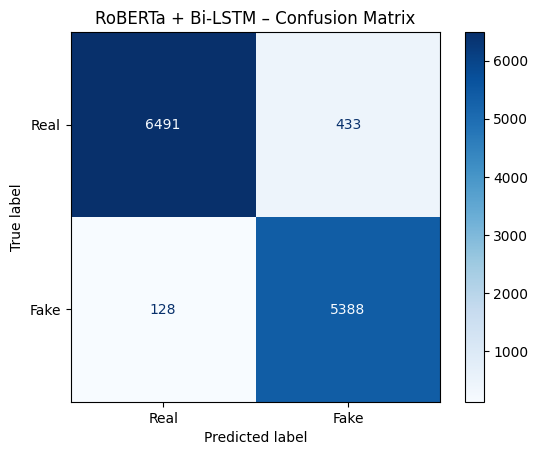


=== DistilBERT + LSTM ===
              precision    recall  f1-score   support

           0     0.9536    0.9380    0.9458      6924
           1     0.9238    0.9427    0.9332      5516

    accuracy                         0.9401     12440
   macro avg     0.9387    0.9404    0.9395     12440
weighted avg     0.9404    0.9401    0.9402     12440



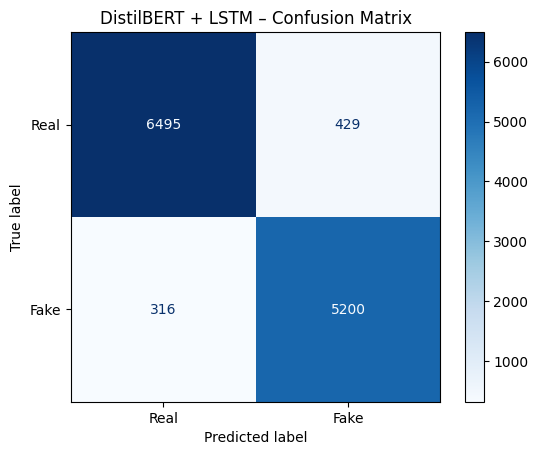


=== DistilBERT + Bi‑LSTM ===
              precision    recall  f1-score   support

           0     0.9674    0.9503    0.9588      6924
           1     0.9390    0.9598    0.9493      5516

    accuracy                         0.9545     12440
   macro avg     0.9532    0.9550    0.9540     12440
weighted avg     0.9548    0.9545    0.9545     12440



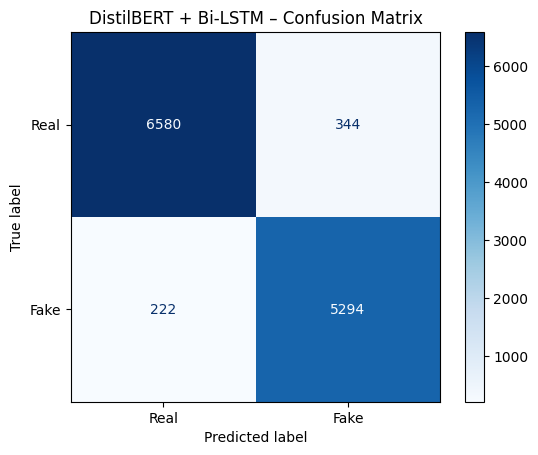

In [67]:
for r in results:
    print(f"\n=== {r['name']} ===")
    print(classification_report(r['y_true'], r['y_pred_lbl'], digits=4))

    cm = confusion_matrix(r['y_true'], r['y_pred_lbl'])
    disp = ConfusionMatrixDisplay(cm, display_labels=['Real','Fake'])
    disp.plot(cmap='Blues')
    plt.title(f"{r['name']} – Confusion Matrix")
    plt.show()

In [63]:
best = max(results, key=lambda x: x['roc_auc'])
print(f"\nBest model: {best['name']} (ROC‑AUC = {best['roc_auc']:.4f})")
!cp "{best['model_path']}" "best_fake_news_model.h5"

# Save the tokenizer that belongs to the best model
best_tokenizer = AutoTokenizer.from_pretrained(
    'roberta-base' if 'RoBERTa' in best['name'] else 'distilbert-base-uncased'
)
best_tokenizer.save_pretrained('best_tokenizer')


Best model: RoBERTa + Bi‑LSTM (ROC‑AUC = 0.9914)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


('best_tokenizer/tokenizer_config.json',
 'best_tokenizer/special_tokens_map.json',
 'best_tokenizer/vocab.json',
 'best_tokenizer/merges.txt',
 'best_tokenizer/added_tokens.json',
 'best_tokenizer/tokenizer.json')

In [82]:
# --------------------------------------------------------------
# ONE‑CELL: LOAD MODEL + TOKENIZER (RUN ONCE – NO ERRORS)
# --------------------------------------------------------------
import os
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras import layers, models
# === 1. PRE‑LOAD ENCODER & TOKENIZER (once) ===
MODEL_NAME = 'roberta-base' 
print(f"Loading encoder: {MODEL_NAME} ...")
encoder = TFAutoModel.from_pretrained(MODEL_NAME)
encoder.trainable = False
tokenizer = AutoTokenizer.from_pretrained('best_tokenizer')
print("Encoder and tokenizer loaded!")

# === 2. CUSTOM LAYER (accepts model_name from .h5) ===
class HFEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, model_name: str = None, **kwargs):
        super().__init__(**kwargs)
        # Use pre‑loaded encoder (ignore model_name from config)
        self.encoder = encoder
        self.tokenizer = tokenizer
        self.model_name = model_name  # for compatibility

    def call(self, inputs):
        output = self.encoder(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            training=False
        )
        return output.last_hidden_state

    def get_config(self):
        config = super().get_config()
        config.update({"model_name": MODEL_NAME})  # ← save the name
        return config

    @classmethod
    def from_config(cls, config):
        model_name = config.pop("model_name", None)
        return cls(model_name, **config)

# === 3. REGISTER & LOAD MODEL ===
custom_objects = {"HFEncoderLayer": HFEncoderLayer}

model_path = 'best_fake_news_model.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found: {model_path}")

print("Loading full model...")
model = models.load_model(
    model_path,
    custom_objects=custom_objects,
    compile=False
)
print("Model loaded successfully!")

# === 4. PREDICTION FUNCTION ===
MAX_LEN = 128

def predict(text: str):
    enc = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=MAX_LEN,
        return_tensors='tf'
    )
    prob = model.predict(
        {
            'input_ids': enc['input_ids'],
            'attention_mask': enc['attention_mask']
        },
        verbose=0
    ).ravel()[0]
    return {
        "probability_fake": float(prob),
        "label": "Fake" if prob >= 0.5 else "Real"
    }

# === 5. TEST ===
sample = "Aliens have landed in India!"
result = predict(sample)
print(f"Test: {result['label']} ({result['probability_fake']:.3f})")

Loading encoder: roberta-base ...
Encoder and tokenizer loaded!
Loading full model...
Model loaded successfully!


2025-11-14 01:20:48.625868: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Test: Fake (0.967)


In [83]:
# --------------------------------------------------------------
# ONE‑CELL: ZIP + DOWNLOAD ALL MODELS
# --------------------------------------------------------------
import os
import zipfile
from IPython.display import FileLink

# === 1. List files to include ===
model_files = [
    f for f in os.listdir('/kaggle/working') 
    if f.endswith('.h5') and 'best_fake_news_model' not in f
]
model_files.append('best_fake_news_model.h5')  # Add best model

# === 2. Create ZIP ===
zip_name = 'fake_news_models.zip'
with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as z:
    # Add all .h5 models
    for f in model_files:
        if os.path.exists(f):
            z.write(f, arcname=f)
            print(f"Added: {f}")
    
    # Add tokenizer folder
    tokenizer_dir = 'best_tokenizer'
    if os.path.exists(tokenizer_dir):
        for root, dirs, files in os.walk(tokenizer_dir):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working')
                z.write(file_path, arcname=arcname)
        print(f"Added: {tokenizer_dir}/ (all files)")

print(f"\nZIP created: {zip_name}")

# === 3. Download link (Kaggle / Colab) ===
display(FileLink(zip_name))

Added: RoBERTa_+_LSTM.h5
Added: RoBERTa_+_Bi‑LSTM.h5
Added: DistilBERT_+_Bi‑LSTM.h5
Added: DistilBERT_+_LSTM.h5
Added: best_fake_news_model.h5
Added: best_tokenizer/ (all files)

ZIP created: fake_news_models.zip


/kaggle/working/fake_news_models.zip